In [124]:
import copy
import numpy as np
from scipy.linalg import norm
from scipy import linalg 
import math
from matplotlib import mlab
import matplotlib.pyplot as plt
from matplotlib import rcParams
import matplotlib.pyplot as plt


Дано:

| x  | f(x)  | f'(x) |
| -- | ----  | ----- |
| 1  |   1   |   a$\leq$0   |
| 2  |   0   |    3         |

In [8]:
arg = np.zeros(2)
arg[0] = 1
arg[1] = 2
 
f = np.zeros(2)
f[0] = 1
f[1] = 0


f1 = np.zeros(2)
f1[0] = np.random.uniform(-10, 0)
f1[1] = 3

print(f1[0])

-0.3119249906499615


#### Интерполируем многочленом в форме Эрмита 

In [114]:
def ermit(arg = np.array(len(arg)), f = np.array(len(f)), f1 = np.array(len(f1))):
    n = len (arg)
    f = list(f)
    arg = list(arg)
    f1 = list(f1)
    j = 0
    while j < n+1:
        f.insert(j+1, f[j])
        arg.insert(j+1, arg[j])
        f1.insert(j+1, f1[j])
        j=j+2
            
    f.reverse()
    arg.reverse()
    f1.reverse()
        
    print('разделенная разность 0-ого порядка = ', f)        

    n = len(f)
    a = np.zeros(n-1)
    
    for j in range(n-1):
        if f[j] == f[j+1]:
            a[j] = f1[j]
        else: 
            a[j] = float((f[j+1] - f[j]) / (arg[j+1] - arg[j]))

     
    print('разделенная разность 1-ого порядка = ', a)

    n = len(a)
    b = np.zeros(n-1)
    for j in range(n-1):
        if a[j] == a[j+1]:
            b[j] = None
        else: 
            b[j] = float((a[j+1] - a[j]) / (arg[j+2] - arg[j]))
    print('разделенная разность 2ого порядка = ', b)

    n = len(a)
    c = np.zeros(n-2)
    for j in range(n-2):
        if b[j] == b[j+1]:
            c[j] = None
        else: 
            c[j] = float((b[j+1] - b[j]) / (arg[j+3] - arg[j]))
    print('разделенная разность 3го порядка = ', c)
    

    d = np.array([f[0], a[0], b[0], c[0]])
 
    return np.array(d)
            
    

In [116]:
a = ermit(arg, f, f1)
print('f1 = ', a[0], '\nf11 = ', a[1], '\nf110 = ', a[2],'\nf1100 = ', a[3] )
print('\nx0 = ', arg[0], ', x1 = ', arg[1])


разделенная разность 0-ого порядка =  [0.0, 0.0, 1.0, 1.0]
разделенная разность 1-ого порядка =  [ 3.         -1.         -0.31192499]
разделенная разность 2ого порядка =  [ 4.         -0.68807501]
разделенная разность 3го порядка =  [4.68807501]
f1 =  0.0 
f11 =  3.0 
f110 =  4.0 
f1100 =  4.6880750093500385

x0 =  1.0 , x1 =  2.0


Тогда интерполяционный многочлен выглядит следующим образом: $$P_2(x) = 0 + 3(x-2) + 4(x-2)^2+(a+5)(x-2)^2(x-1)$$
$$a+5 = f_{1100}$$



Погрешность интерполяции: $$R(x)=\frac{4}{2!}(x-2)^2(x-1) $$
Учитывая $P(1.5) = 0, R(1.5) = 0.25\sim 10^{-2}$


In [128]:
def P_2 (x, a):
    return  0 + 3 * (x - 2) + 4 * (x - 2) ** 2 + (a + 5) * (x - 1) * (x - 2) ** 2
 

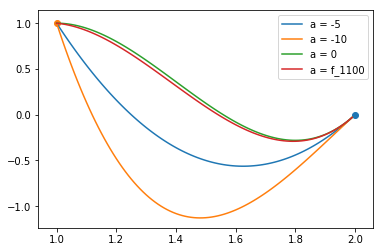

In [139]:
list_x = [1 + i/100 for i in range (0, 100)]
list_y = [P_2(list_x[i], -5) for i in range(0, 100)]
plt.plot(list_x, list_y, label = u'a = -5')
list_y = [P_2(list_x[i], -10) for i in range(0, 100)]
plt.plot(list_x, list_y, label = u'a = -10')
list_y = [P_2(list_x[i], 0) for i in range(0, 100)]
plt.plot(list_x, list_y, label = u'a = 0')
list_y = [P_2(list_x[i], f1[0]) for i in range(0, 100)]
plt.plot(list_x, list_y, label = u'a = f_1100')
plt.scatter(2, 0)
plt.scatter(1, 1)
plt.legend()

plt.show()